In [ ]:
# default_exp dataset

# dataset.py

> Loading Dataset

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# export
import os
import torch
from torch.utils.data import Dataset
from baseline_3d_pose.utils import *
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
# export
class Human36Dataset(Dataset):
    def __init__(self, actions, data_path, is_train=True):
        self.actions, self.data_path, self.is_train = actions, data_path, is_train
        self.inp_list, self.out_list, self.key_list = [], [], []
        
        if self.is_train:
            self.data_2d = torch.load(data_path/'train_2d.pth.tar')
            self.data_3d = torch.load(data_path/'train_3d.pth.tar')
        else:
            self.data_2d = torch.load(data_path/'test_2d.pth.tar')
            self.data_3d = torch.load(data_path/'test_3d.pth.tar')
        
        for key in self.data_2d.keys():
            assert self.data_2d[key].shape[0] == self.data_3d[key].shape[0]
            num_file = self.data_2d[key].shape[0]
            for i in range(num_file):
                self.inp_list.append(self.data_2d[key][i])
                self.out_list.append(self.data_3d[key][i])
                self.key_list.append(key)
                
    def __getitem__(self, idx):
        inp = torch.from_numpy(self.inp_list[idx]).float()
        out = torch.from_numpy(self.out_list[idx]).float()
        key = self.key_list[idx]
        return inp, out, key
    
    def __len__(self):
        return len(self.inp_list)

In [ ]:
train_h36 = Human36Dataset(get_actions('All'), data_path, is_train=True)
test_h36 = Human36Dataset(get_actions('All'), data_path, is_train=False)

In [ ]:
len(train_h36), len(test_h36)

(1559752, 550644)

In [ ]:
rcams = torch.load(data_path/'rcams.pth.tar')

stat_2d = torch.load(data_path/'stat_2d.pth.tar')
mean_2d = stat_2d['mean']
std_2d = stat_2d['std']
dim_use_2d = stat_2d['dim_use']
dim_ignore_2d = stat_2d['dim_ignore']

stat_3d = torch.load(data_path/'stat_3d.pth.tar')
mean_3d = stat_3d['mean']
std_3d = stat_3d['std']
dim_use_3d = stat_3d['dim_use']
dim_ignore_3d = stat_3d['dim_ignore']

In [ ]:
idx = 100000
train_2d = train_h36[idx][0].reshape(1, -1)
train_3d = train_h36[idx][1].reshape(1, -1)
train_key = train_h36[idx][2]

test_2d = test_h36[idx][0].reshape(1, -1)
test_3d = test_h36[idx][1].reshape(1, -1)
test_key = test_h36[idx][2]

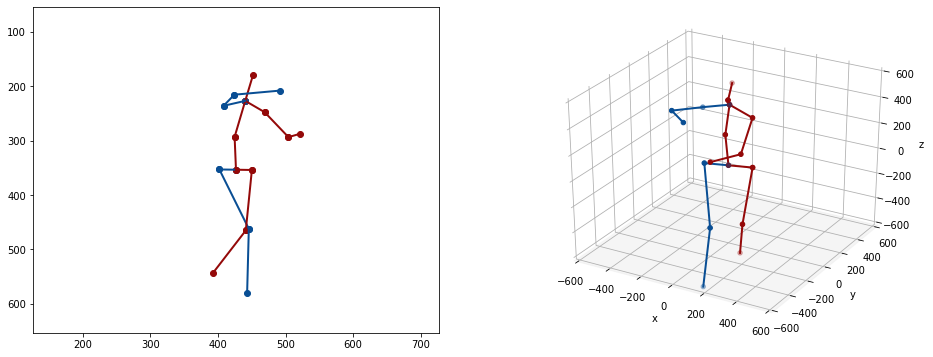

In [ ]:
plt.figure(figsize=(16,6))
gs2 = GridSpec(1,2)
ax1 = plt.subplot(gs2[0])
ax2 = plt.subplot(gs2[1], projection='3d')

ts_2d = unnormalize_data(train_2d, mean_2d, std_2d, dim_ignore_2d)
ts_3d = unnormalize_data(train_3d, mean_3d, std_3d, dim_ignore_3d)
ts_3d = cam_to_world_centered(ts_3d, train_key, rcams)

show_2d_pose(ts_2d, ax1)
ax1.invert_yaxis()

show_3d_pose(ts_3d, ax2)

plt.show()

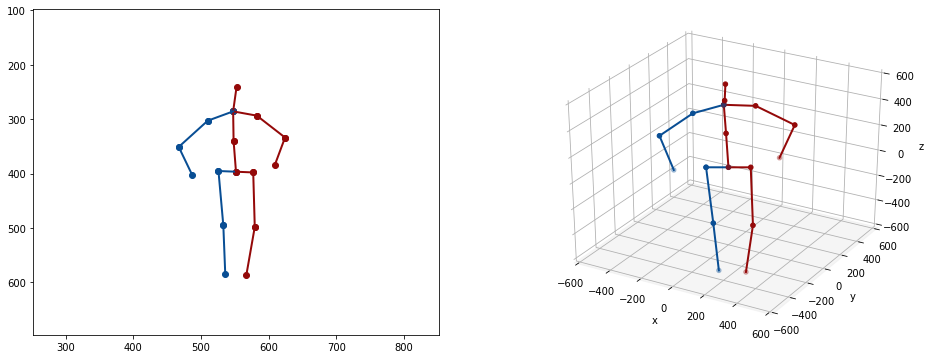

In [ ]:
plt.figure(figsize=(16,6))
gs2 = GridSpec(1,2)
ax1 = plt.subplot(gs2[0])
ax2 = plt.subplot(gs2[1], projection='3d')

ts_2d = unnormalize_data(test_2d, mean_2d, std_2d, dim_ignore_2d)
ts_3d = unnormalize_data(test_3d, mean_3d, std_3d, dim_ignore_3d)
ts_3d = cam_to_world_centered(ts_3d, test_key, rcams)

show_2d_pose(ts_2d, ax1)
ax1.invert_yaxis()

show_3d_pose(ts_3d, ax2)

plt.show()